# Chargement et Analyse exploratoire des données (EDA)

## Chargement des Données

In [10]:
import pandas as pd

df = pd.read_csv("dataset-diabetes.csv")

## Comprendre la structure générale du jeu de données

In [11]:
pd.set_option('display.width', 500)

print(df.dtypes)

print("\n")

print("Dimensions:", df.shape)

print("Le nombre des lignes est:", df.shape[0])

print("Le nombre de colonnes est:", df.shape[1])

print("\n")

print(df.head())

print("\n")

print(df.tail())

print("\n")

print(df.sample(5))

Unnamed: 0                    int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object


Dimensions: (768, 9)
Le nombre des lignes est: 768
Le nombre de colonnes est: 9


   Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age
0           0            6      148             72             35        0  33.6                     0.627   50
1           1            1       85             66             29        0  26.6                     0.351   31
2           2            8      183             64              0        0  23.3                     0.672   32
3           3            1       89             66             23       94  28.1                     0.167   21
4           4     

## Identifier les valeurs manquantes et les doublons.

In [12]:
df.duplicated().sum()

np.int64(0)

### Il n'ya pas de doublons

In [13]:
df.isnull().sum()

Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [14]:
(df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] == 0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [15]:
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])


In [22]:
import numpy as np

df[['Glucose', 'BloodPressure', 'BMI', 'Insulin', 'SkinThickness']] = df[['Glucose', 'BloodPressure', 'BMI', 'Insulin', 'SkinThickness']].replace(0,np.nan)


## Analyser la distribution des variables numériques.

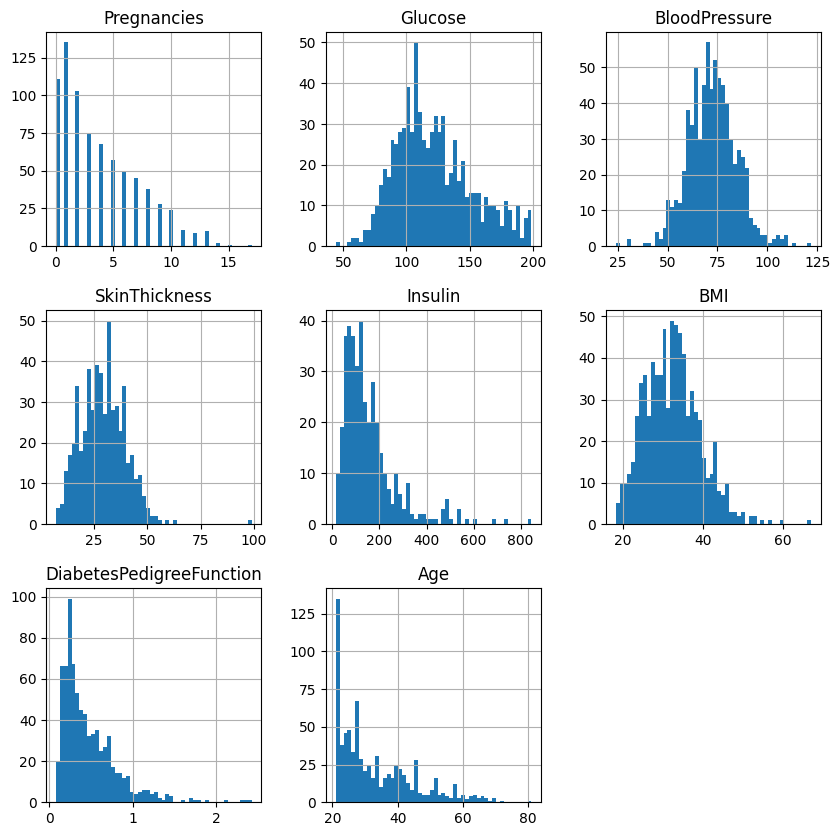

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(bins=50, figsize=(10, 10))
plt.show()


### Étudier les relations entre variables à l’aide de matrices de corrélation et de visualisations

                          Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  DiabetesPedigreeFunction       Age
Pregnancies                  1.000000  0.128135       0.214178       0.100239  0.082171  0.021719                 -0.033523  0.544341
Glucose                      0.128135  1.000000       0.223192       0.228043  0.581186  0.232771                  0.137246  0.267136
BloodPressure                0.214178  0.223192       1.000000       0.226839  0.098272  0.289230                 -0.002805  0.330107
SkinThickness                0.100239  0.228043       0.226839       1.000000  0.184888  0.648214                  0.115016  0.166816
Insulin                      0.082171  0.581186       0.098272       0.184888  1.000000  0.228050                  0.130395  0.220261
BMI                          0.021719  0.232771       0.289230       0.648214  0.228050  1.000000                  0.155382  0.025841
DiabetesPedigreeFunction    -0.033523  0.137246      -0.002805

<Axes: >

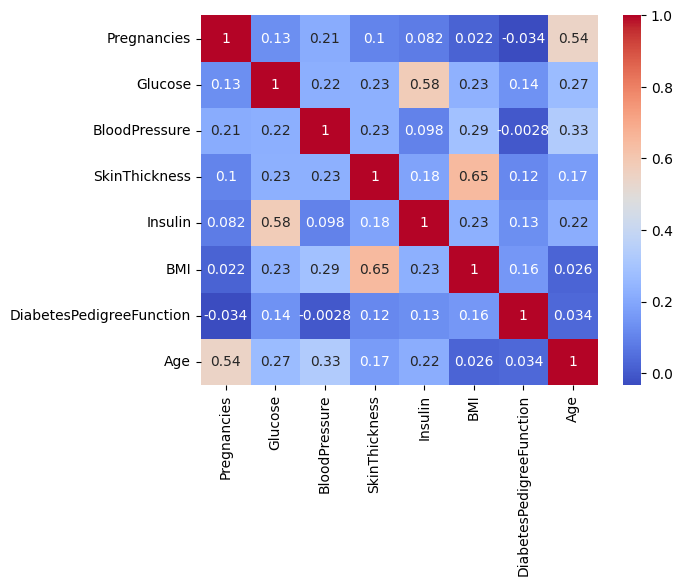

In [18]:
corr_matrix = df.corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')

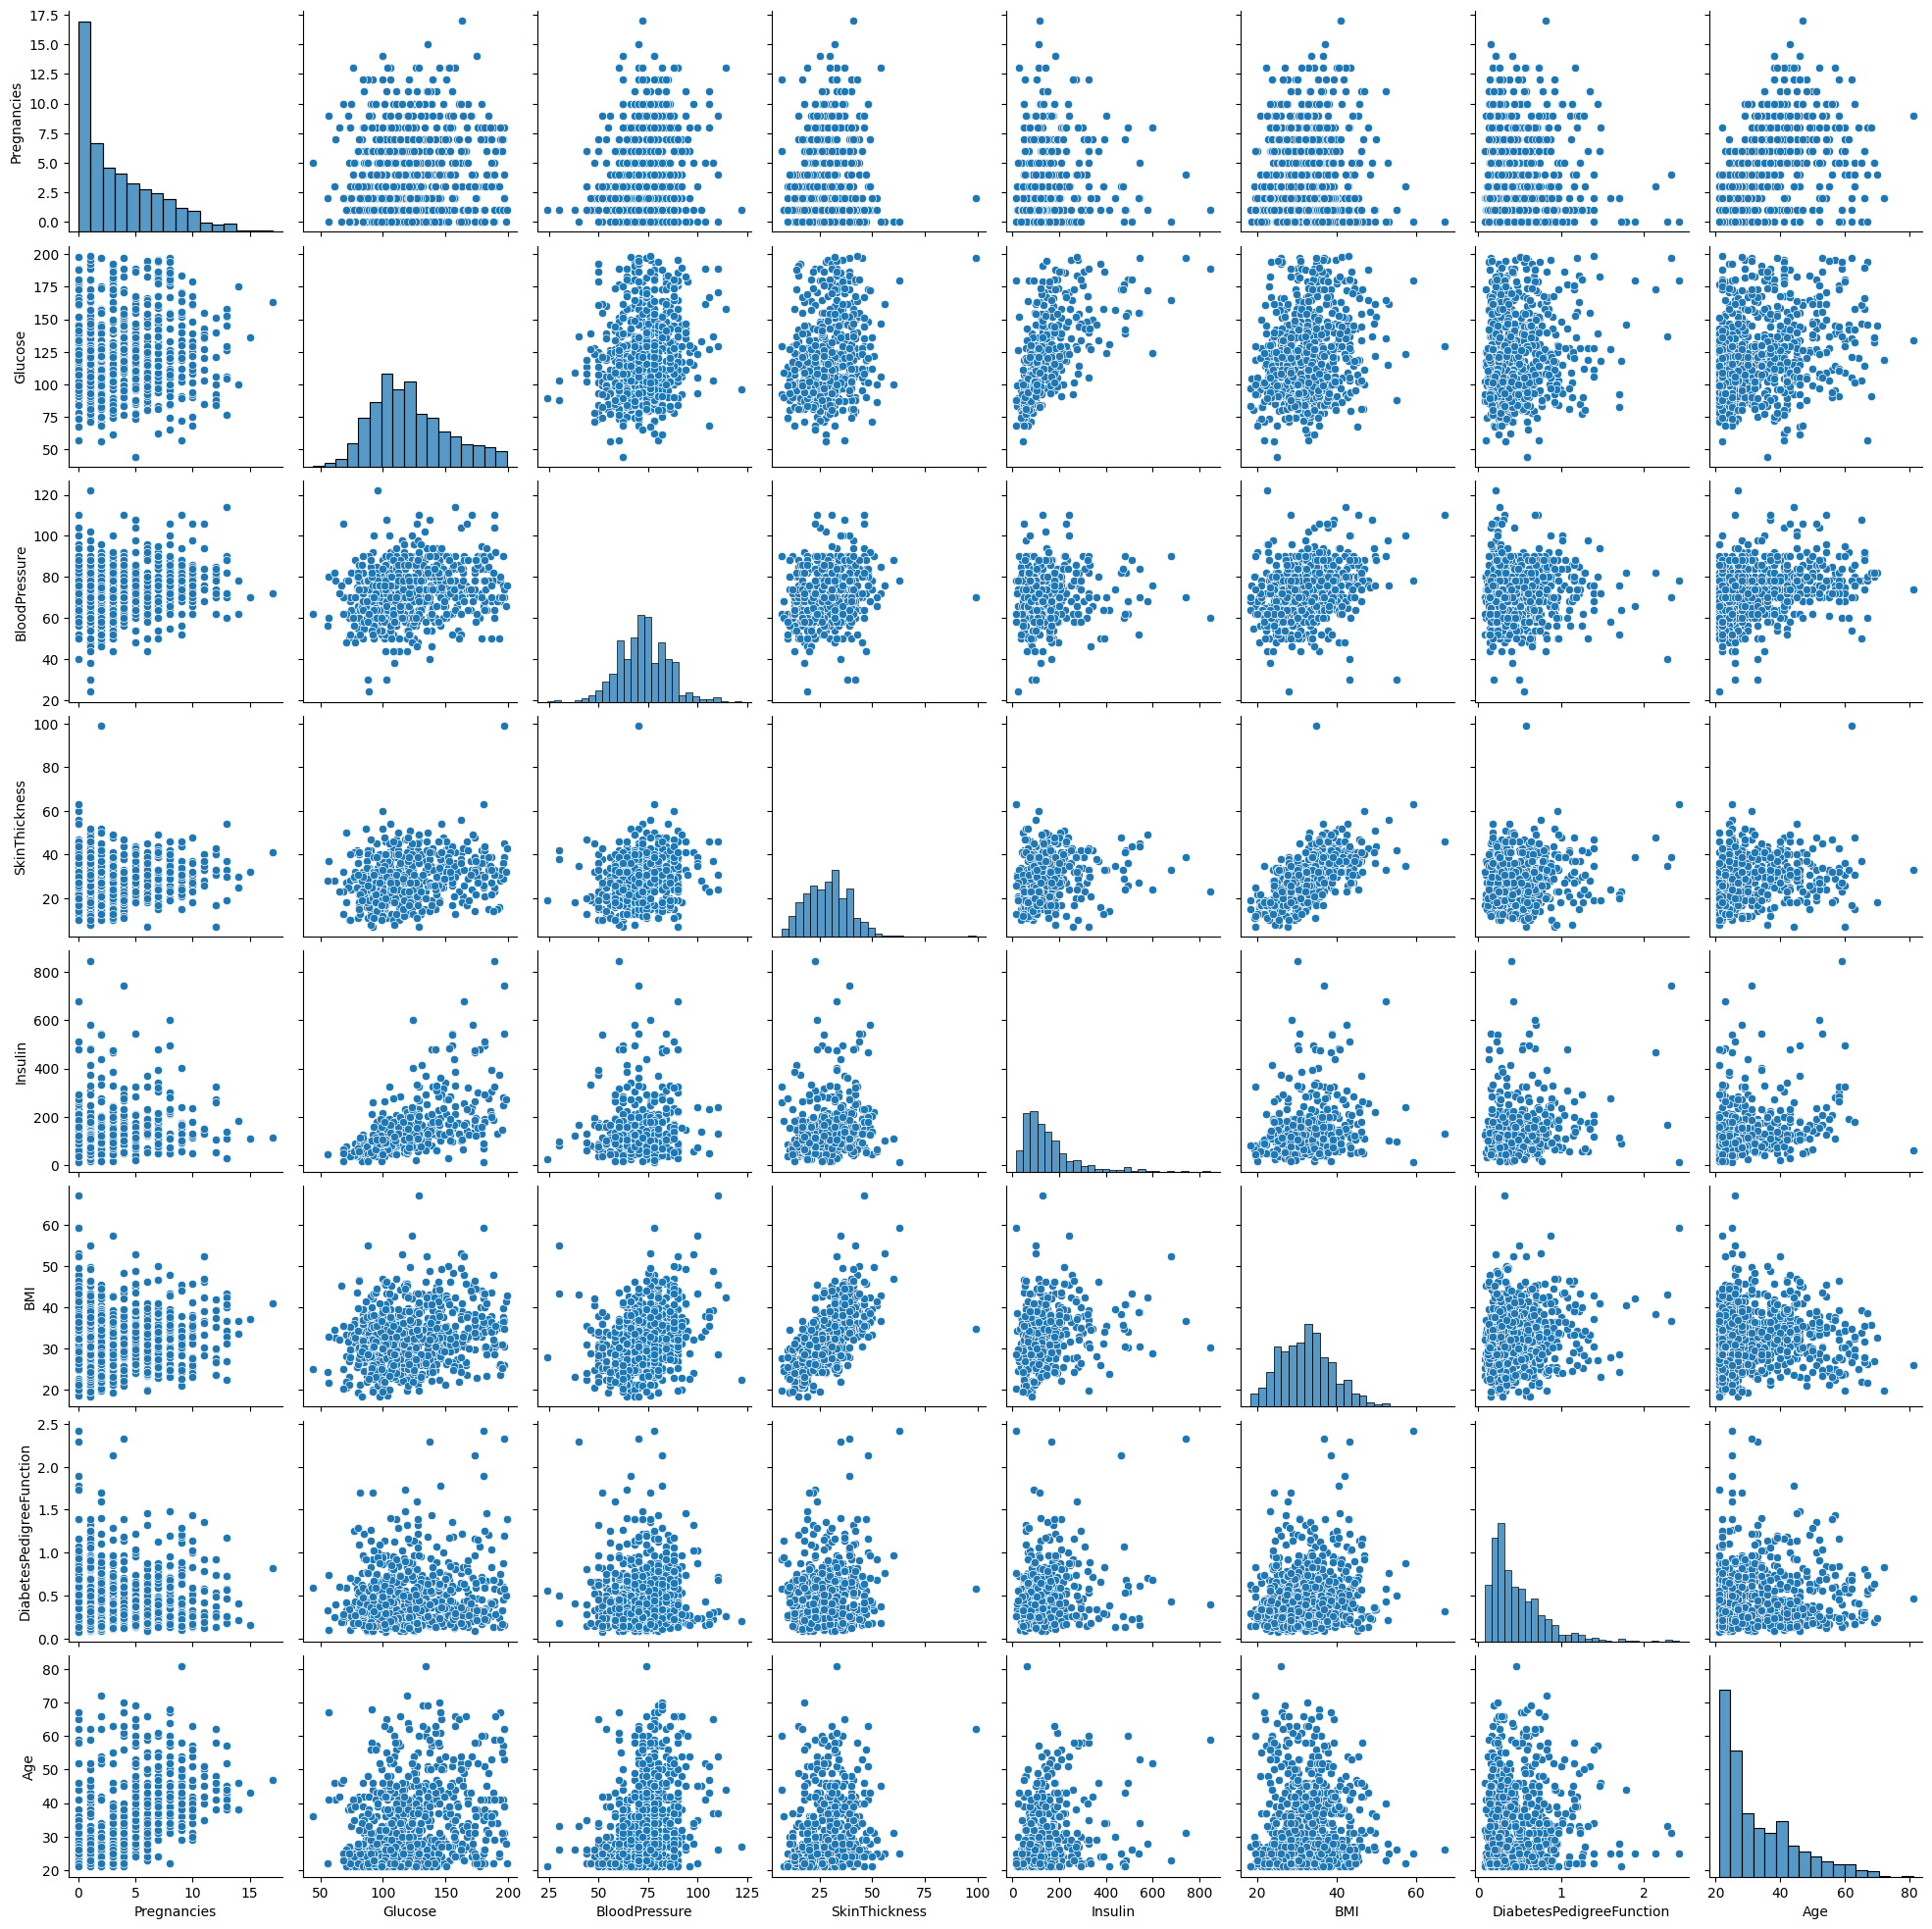

In [19]:
sns.pairplot(df)
plt.show()

### Identifier et traiter les valeurs manquantes dans le jeu de données

In [28]:
pd.isna(df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [29]:
from sklearn.impute import KNNImputer

df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = KNNImputer(n_neighbors = 5).fit_transform(df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])

In [31]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,209.0,33.6,0.627,50
1,1,85.0,66.0,29.0,73.0,26.6,0.351,31
2,8,183.0,64.0,29.4,383.2,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,213.4,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,20.6,180.8,30.1,0.349,47


### Détection et gestion des valeurs aberrantes

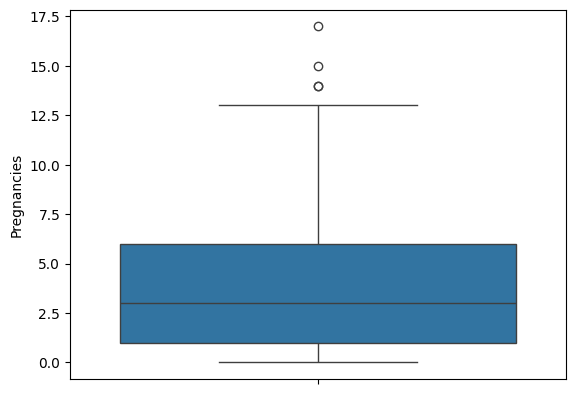

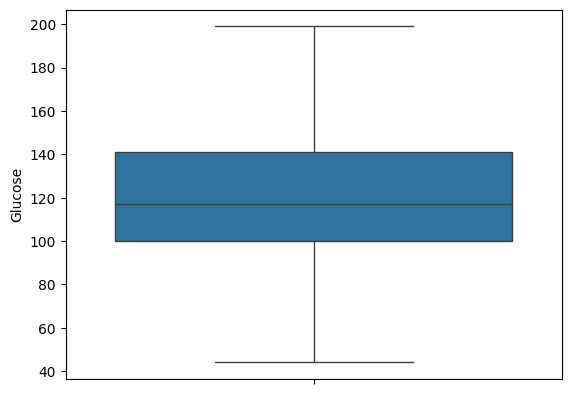

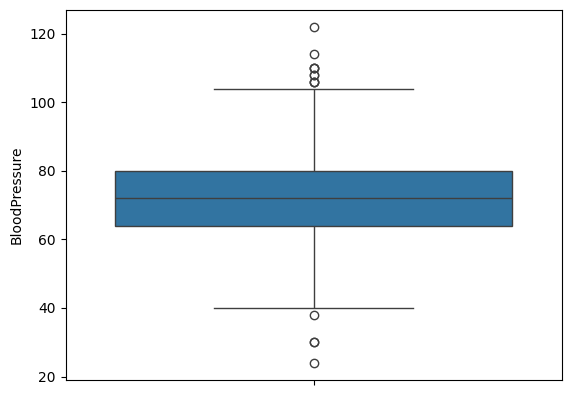

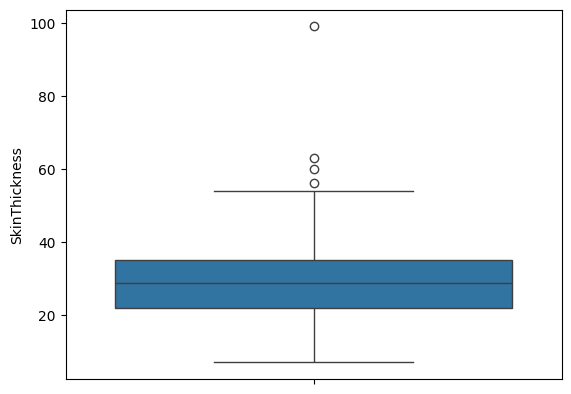

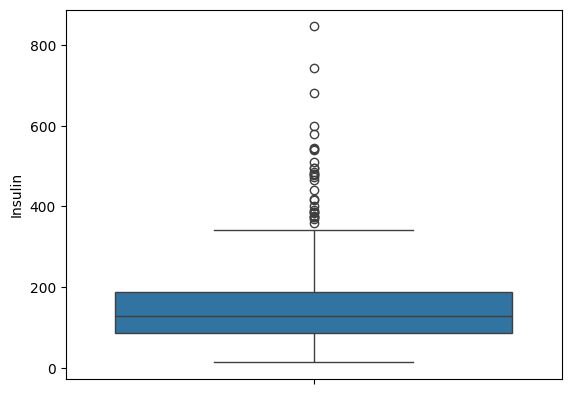

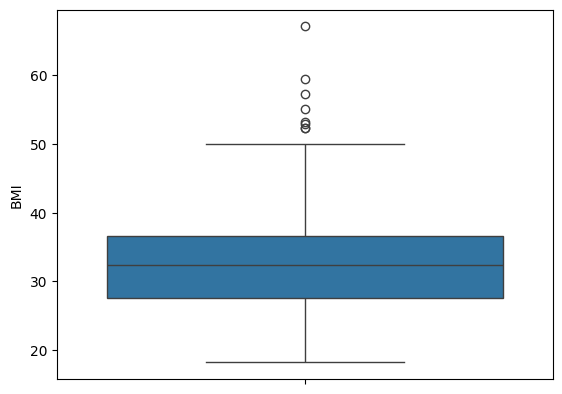

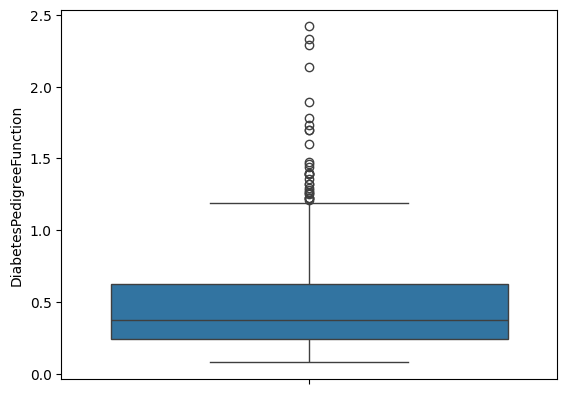

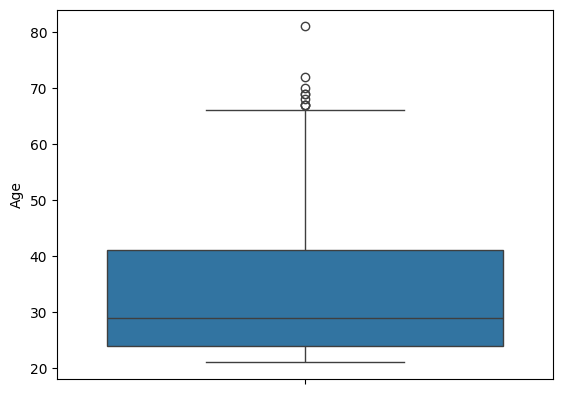

In [43]:
sns.boxplot(y=df['Pregnancies'])
plt.show()
sns.boxplot(y=df['Glucose'])
plt.show()
sns.boxplot(y=df['BloodPressure'])
plt.show()
sns.boxplot(y=df['SkinThickness'])
plt.show()
sns.boxplot(y=df['Insulin'])
plt.show()
sns.boxplot(y=df['BMI'])
plt.show()
sns.boxplot(y=df['DiabetesPedigreeFunction'])
plt.show()
sns.boxplot(y=df['Age'])
plt.show()

In [44]:
df_capped = df.copy()

columns_to_cap = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for col in columns_to_cap:

    Q1 = df[col].quantile(0.25)

    Q3 = df[col].quantile(0.75)

    IQR = Q3-Q1

    lower_bound = Q1 - 1.5 * IQR

    upper_bound = Q3 + 1.5 * IQR

    df_capped[col] = np.clip(df_capped[col], lower_bound, upper_bound)